- Nom 1: Guillem Calaf
- Nom 2: Marc Bellés

# Estadística

## Distribución de probabilidad

### ¿Qué distribución estadística siguen?

c:\Users\Informatica\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


La columna Any no sigue una distribución normal.
La columna Trimestre no sigue una distribución normal.
La columna Codi_Districte no sigue una distribución normal.
La columna Codi_Barri no sigue una distribución normal.
La columna N_compravendes no sigue una distribución normal.
La columna Valor no sigue una distribución normal.
La columna M2 no sigue una distribución normal.


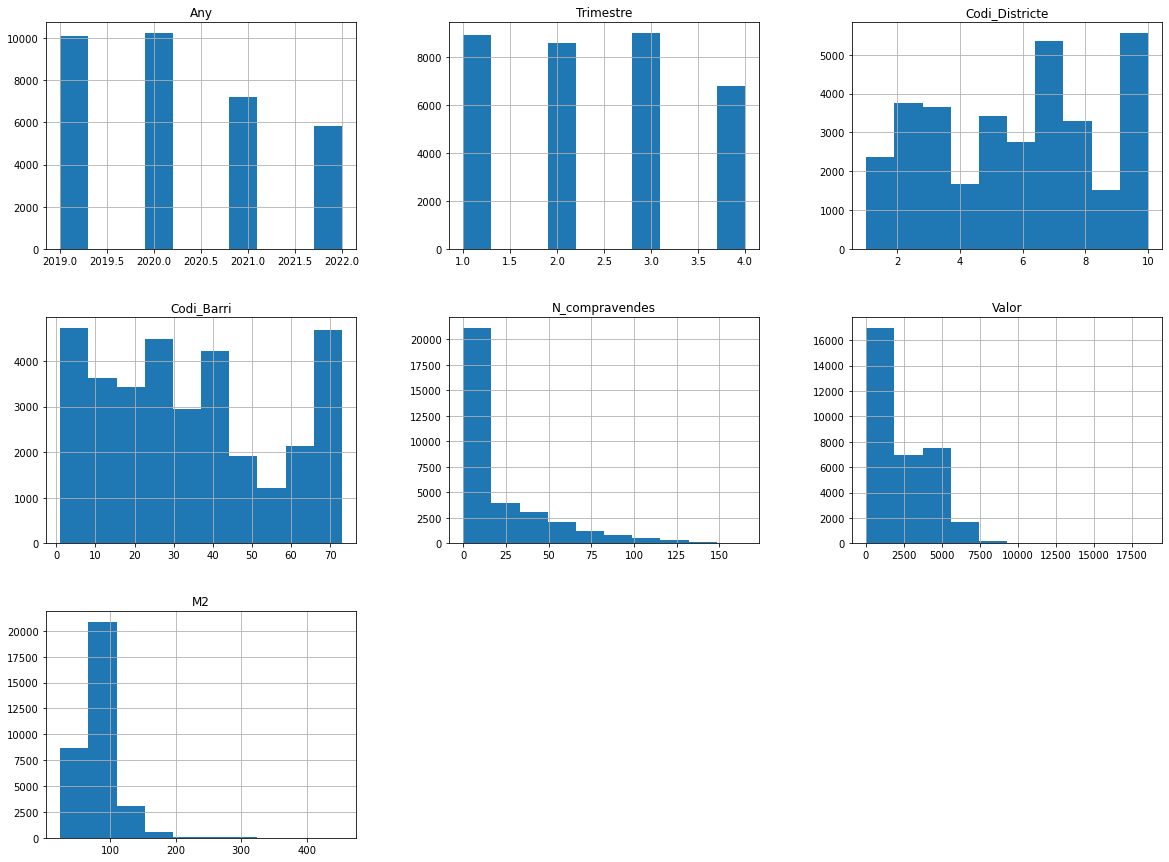

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

comp_vend = pd.read_csv('comp_vend.csv')

numeric_columns = comp_vend.select_dtypes(include=['number'])

for column in numeric_columns.columns:
    # Realizar la prueba de Shapiro-Wilk para la columna actual
    stat, p_value = shapiro(comp_vend[column])
    
    # Definir el nivel de significancia
    alpha = 0.05
    
    # Comprobar si la columna sigue una distribución normal
    if p_value > alpha:
        print("La columna", column, "sigue una distribución normal.")
    else:
        print("La columna", column, "no sigue una distribución normal.")

comp_vend.hist(figsize=(20,15))
plt.show()



### ¿Teniendo en cuenta que dispongo de 280k que % de viviendas se encuentran por debajo de la distribución?


C:\Users\Informatica\AppData\Local\Temp\ipykernel_9472\535427674.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_milers['Valor'] = total_milers['Valor'] * 1000
C:\Users\Informatica\AppData\Local\Temp\ipykernel_9472\535427674.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_m2['Valor'] = total_m2['Valor'] * total_m2['M2']


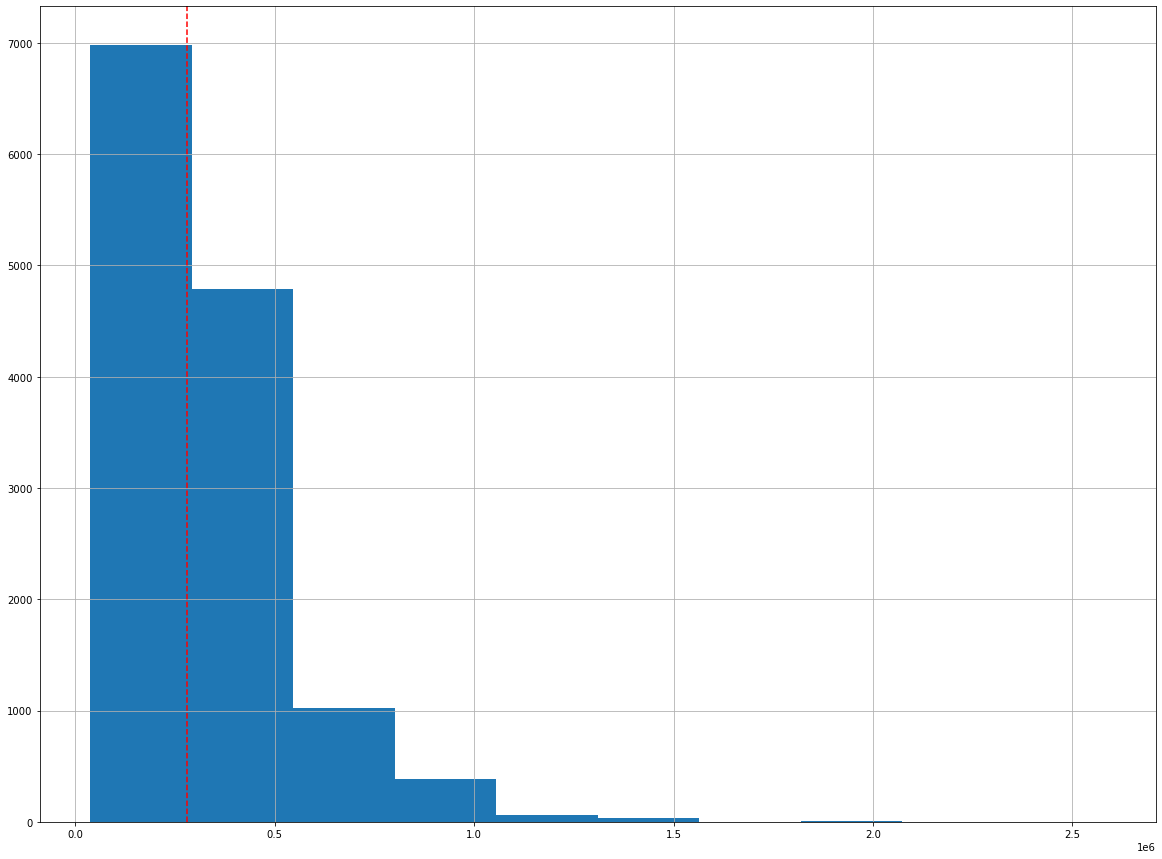

El % de viviendas que se encuentran por debajo de la distribución de 280k es: 50.21 %


In [143]:
disponible = 280000

# Seleccionamos que el tipo de precio medio sea Total
total = comp_vend[comp_vend['Tipus_Preu_Mitja'].str.contains('Total')]

# Separamos los que se calculan por miles de euros y los que se calculan según el m2
total_milers = total[total['Tipus_Preu_Mitja'].str.contains("Milers d'euros")]
total_m2 = total[total['Tipus_Preu_Mitja'].str.contains("Euros/m2 construït")]

# Aplicamos los calculos para scar el valor total de cada vivienda
total_milers['Valor'] = total_milers['Valor'] * 1000
total_m2['Valor'] = total_m2['Valor'] * total_m2['M2']

# Concatenamos los dos dataframes
total = pd.concat([total_milers, total_m2])

# Mostramos el histograma
total['Valor'].hist(figsize=(20,15))
plt.axvline(x=disponible, color='r', linestyle='--')
plt.show()

# Resultado
print('El % de viviendas que se encuentran por debajo de la distribución de 280k es:', round((total[total['Valor'] < disponible].shape[0] / total.shape[0]) * 100, 2), '%')


## Regresión - EDA

### A partir del precio predicho, sabiendo que quiero vivir en Gracia y que tengo 280k, destacame las 10 viviendas que me salen mas a cuenta ( su aprecio se aleja más porcentualmente del valor predicho)

Error:  5066625483.200629
R2:  0.362138483831301


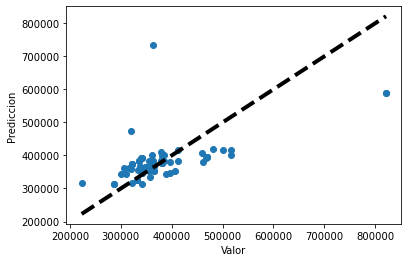

C:\Users\Informatica\AppData\Local\Temp\ipykernel_9472\980815155.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_predicho['Valor_Predicho'] = valor_predicho
C:\Users\Informatica\AppData\Local\Temp\ipykernel_9472\980815155.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_predicho['Diferencia'] = total_predicho['Valor'] - total_predicho['Valor_Predicho']
C:\Users\Informatica\AppData\Local\Temp\ipykernel_9472\980815155.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Tipus_Compravendes,N_compravendes,Tipus_Preu_Mitja,Valor,Tipus_Superficie,M2,Valor_Predicho,Diferencia,Diferencia_Porcentual
14287,2020,2,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,Habitatge nou lliure,3,Total. Euros/m2 construït,1069605.55,Habitatge nou lliure,232.7,733636.014444,335969.535556,31.410601
14305,2020,2,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,Habitatge nou protegit,0,Total. Euros/m2 construït,1069605.55,Habitatge nou lliure,232.7,733636.014444,335969.535556,31.410601
14323,2020,2,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,Habitatge usat,31,Total. Euros/m2 construït,1069605.55,Habitatge nou lliure,232.7,733636.014444,335969.535556,31.410601
16825,2020,3,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,Habitatge usat,49,Total. Euros/m2 construït,1217563.20,Habitatge nou lliure,282.0,849522.321908,368040.878092,30.227661
16807,2020,3,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,Habitatge nou protegit,0,Total. Euros/m2 construït,1217563.20,Habitatge nou lliure,282.0,849522.321908,368040.878092,30.227661
16789,2020,3,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,Habitatge nou lliure,1,Total. Euros/m2 construït,1217563.20,Habitatge nou lliure,282.0,849522.321908,368040.878092,30.227661
8854,2019,4,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,Habitatge nou protegit,0,Total. Euros/m2 construït,821213.60,Habitatge nou lliure,164.0,589049.561623,232164.038377,28.270847
8842,2019,4,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,Habitatge nou lliure,1,Total. Euros/m2 construït,821213.60,Habitatge nou lliure,164.0,589049.561623,232164.038377,28.270847
8866,2019,4,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,Habitatge usat,40,Total. Euros/m2 construït,821213.60,Habitatge nou lliure,164.0,589049.561623,232164.038377,28.270847
8818,2019,4,6,Gràcia,31,la Vila de Gràcia,Habitatge usat,58,Total. Milers d'euros,516100.00,Habitatge nou lliure,84.7,402644.202963,113455.797037,21.983297


In [144]:
# Importamos las librerias necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamos el modelo para saber las 10 viviendas que salen más a acuenta en el barrio de Gracia
model = LinearRegression()
disponible = 280000
X = total[total['Nom_Barri'].str.contains('Gràcia')][['M2', 'Any']]
y = total[total['Nom_Barri'].str.contains('Gràcia')]['Valor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculamos el error
print('Error: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

# Mostramos graficamente el error
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valor')
plt.ylabel('Prediccion')
plt.show()

# Mostramos las 10 viviendas que salen más a acuenta:
valor_predicho = model.predict(X)
total_predicho = total[total['Nom_Barri'].str.contains('Gràcia')]
total_predicho['Valor_Predicho'] = valor_predicho
total_predicho['Diferencia'] = total_predicho['Valor'] - total_predicho['Valor_Predicho']
total_predicho['Diferencia_Porcentual'] = (total_predicho['Diferencia'] / total_predicho['Valor']) * 100
total_predicho.sort_values(by=['Diferencia_Porcentual'], ascending=False).head(10)

## Regresión: 

### Introduciendo los m2 y el barrio ser capaz de predecir precio

In [145]:
# Seleccionar las columnas de interés
total_regresion = total[['M2', 'Nom_Barri', 'Valor']]

# Convertir el nombre del barrio en variables dummy (one-hot encoding)
total_regresion = pd.get_dummies(total_regresion, columns=['Nom_Barri'])

# Separar los datos en características (X) y etiquetas (y)
X = total_regresion.drop('Valor', axis=1)
y = total_regresion['Valor']

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Realizar una predicción para un nuevo ejemplo
m2 = 80
barrio = 'el Raval'

# Crear un nuevo dataframe con las características del ejemplo
X_new = pd.DataFrame(columns=X.columns)
X_new['M2'] = [m2]
X_new['Nom_Barri_' + barrio] = [1]
X_new = X_new.fillna(0)
X_new.head()

# Realizar la predicción
prediction = model.predict(X_new)[0]

# Mostrar el resultado
print("La predicción del precio para una vivienda de", m2, "m2 en el barrio", barrio, "es:", prediction)

La predicción del precio para una vivienda de 80 m2 en el barrio el Raval es: 259766.25


## Resolución de Hipótesis: 

### ¿Hay diferencias significativas entre los precios de los barrios de El Clot y La Sagrera? 

In [146]:
import scipy.stats as stats

# Obtener los precios de los barrios de El Clot y La Sagrera
el_clot_prices = total[total['Nom_Barri'] == 'El Clot']['Valor']
la_sagrera_prices = total[total['Nom_Barri'] == 'La Sagrera']['Valor']

# Realizar la prueba t de Student para comparar las medias
t_statistic, p_value = stats.ttest_ind(el_clot_prices, la_sagrera_prices)

# Definir el nivel de significancia
alpha = 0.05

# Comprobar si la diferencia es significativa
if p_value < alpha:
    print("Hay diferencias significativas entre los precios de El Clot y La Sagrera.")
else:
    print("No hay diferencias significativas entre los precios de El Clot y La Sagrera.")


No hay diferencias significativas entre los precios de El Clot y La Sagrera.
